# Exercises I

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away.

Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.
1. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.
1. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.

# Imports

In [1]:
import pandas as pd
import numpy as np

from env import user, password, host

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
dd = pd.read_excel('zillow_data_dictionary.xlsx')
dd

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


# Acquire

Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [3]:
url = f"mysql+pymysql://{user}:{password}@{host}/zillow"
    
query = '''
            
SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
FROM properties_2017

LEFT JOIN propertylandusetype USING(propertylandusetypeid)

WHERE propertylandusedesc IN ("Single Family Residential",                       
                              "Inferred Single Family Residential")'''

In [4]:
data = pd.read_sql(query, url)
df = data.copy()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [5]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152853 non-null  float64
 1   bathroomcnt                   2152853 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152371 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148422 non-null  float64
 6   fips                          2152864 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [6]:
# renaming columns
df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'area',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})

### Managing Null Values

In [7]:
# get total of null values for each row
df.isnull().sum()

bedrooms        11
bathrooms       11
area          8485
tax_value      493
year_built    9338
taxamount     4442
fips             0
dtype: int64

**Takeaway**
- Large number of outliers in some columns
- Real estate data may be heavily skewed
- If our plan is to remove outliers, could removing outliers also reduce our null count?

### Visualizing Distributions & Outliers

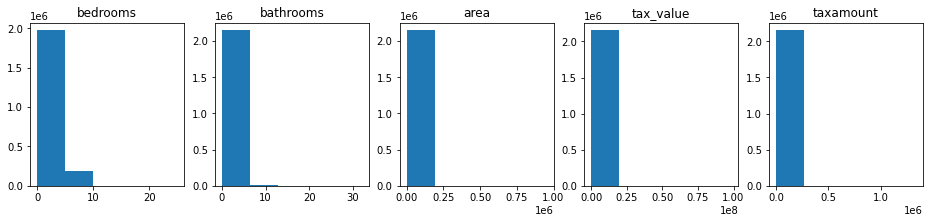

In [8]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

**Takeaways**
- Outliers must exist in each column for the x-axis to have the range shown
- `tax_value` is looking like it has severe skew, due to a x-axis range that goes to 1e8

<AxesSubplot:>

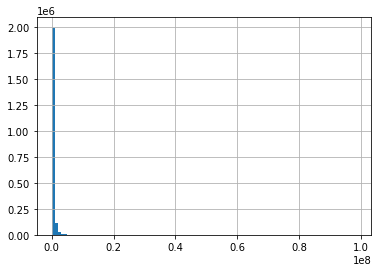

In [9]:
# Looking at tax_value in closer detail
df['tax_value'].hist(bins=100)

### Boxplots
Naturally show outliers as black diamonds

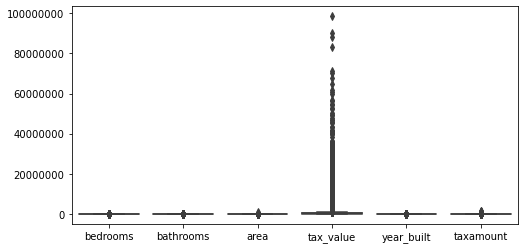

In [10]:
plt.figure(figsize=(8,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df.drop(columns=['fips']))

plt.show()

`tax_value` has such a severe outlier problem, it is making the chart unreadable

Could we make the charts bigger to see if visualization improves?

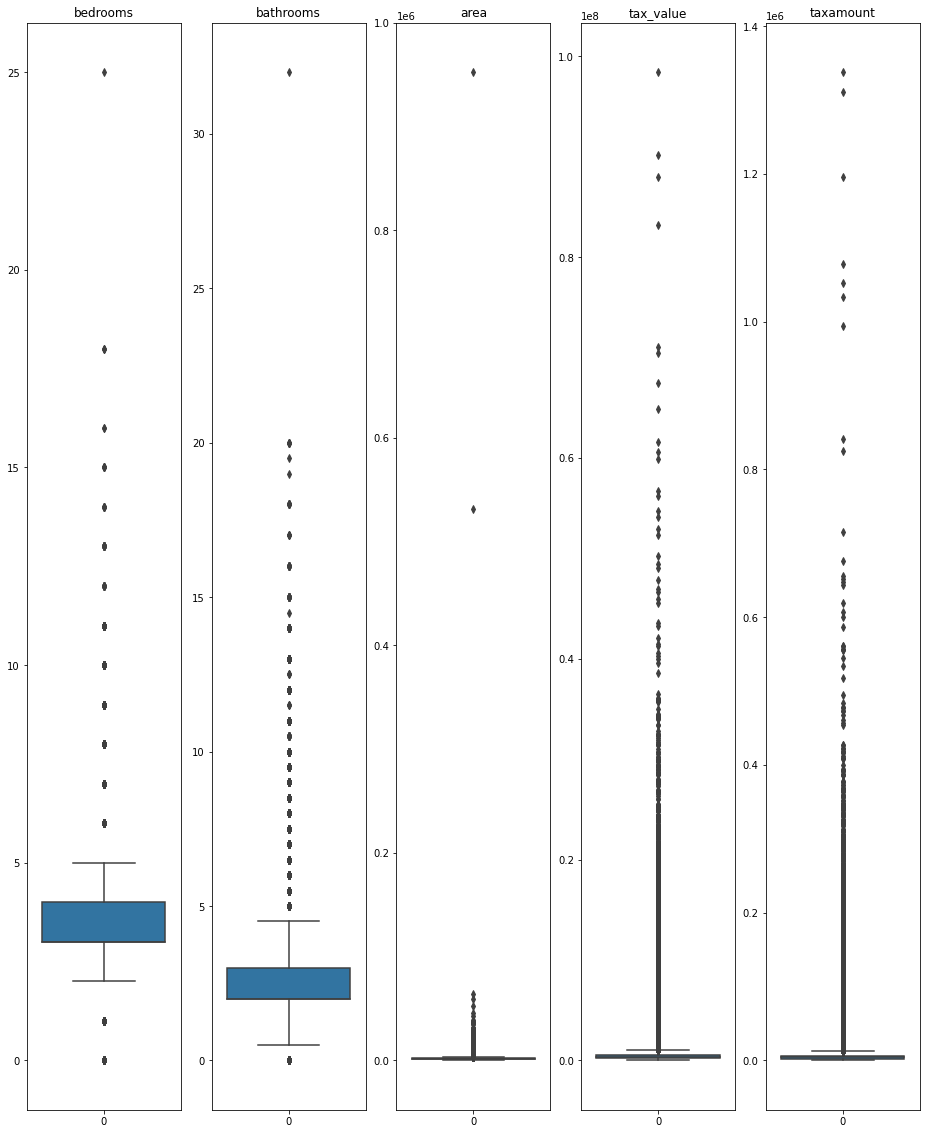

In [11]:
# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]
plt.figure(figsize=(16, 20))
for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[col])

    # Hide gridlines.
    plt.grid(False)

plt.show()

What are the quartiles for each of these columns?

In [12]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
count,2.15285e+06,2.15285e+06,2.14438e+06,2.15237e+06,2.14353e+06,2.14842e+06,2.15286e+06
mean,3.28719,2.23069,1862.86,461896,1960.95,5634.86,6048.38
std,0.954757,0.999281,1222.13,699676,22.1622,8178.91,20.4333
min,0,0,1,1,1801,1.85,6037
25%,3,2,1257,188170,1949,2534.97,6037
50%,3,2,1623,327671,1958,4108.94,6037
75%,4,3,2208,534527,1976,6414.32,6059
max,25,32,952576,9.84289e+07,2016,1.33776e+06,6111


**Takeaways**
- Substantial outliers exist
- If we presume that we are going to use our data to build a model that focuses on median home values, then we can drop these outliers.
- This may also help with our null value issue

In [13]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [14]:
def remove_outliers_v2(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    # Create a column that will label our rows as containing an outlier value or not
    num_obs = df.shape[0]
    df['outlier'] = False
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # update the outlier label any time that the value is outside of boundaries
        df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
    
    df = df[df.outlier == False]
    df.drop(columns=['outlier'], inplace=True)
    print(f"Number of observations removed: {num_obs - df.shape[0]}")
        
    return df

In [15]:
df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])
df

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
...,...,...,...,...,...,...,...
2152853,3.0,2.0,1917.0,408680.0,1946.0,4341.32,6111.0
2152854,4.0,2.0,1987.0,259913.0,1955.0,3175.66,6059.0
2152856,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


### Revisualize Distributions
Lets revisualize our data now that its be cleaned a bit (approximately 300,000 observations removed):

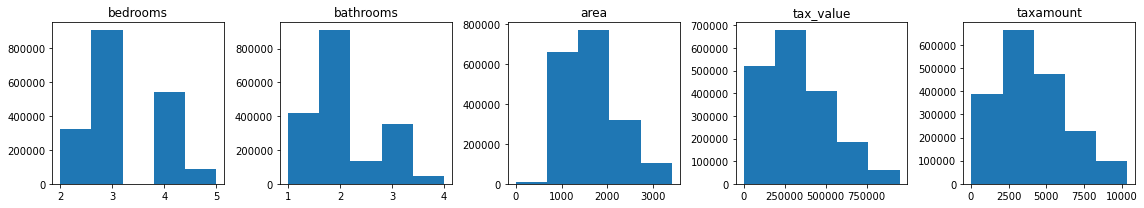

In [16]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
    # mitigate overlap
    plt.tight_layout()
    
plt.show()

Takeaways 
* Bedrooms and bathrooms are not normally distributed
* Other fields are skewed, but are at least approaching a more normal distribution

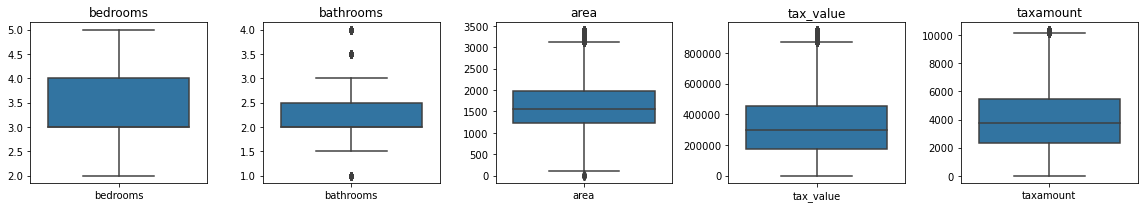

In [17]:
# List of columns
cols = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

plt.figure(figsize=(16, 3))

for i, col in enumerate(cols):

    # i starts at 0, but plot should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # Hide gridlines.
    plt.grid(False)

    # sets proper spacing between plots
    plt.tight_layout()
    
plt.show()

Takeaways 
* Still a few outliers despite the relatively restrictive 1.5 * IQR setting for the upper/lower boundary
* No need to remove these outliers

### How do the null values look now?

In [18]:
# get total of null values for each row
df.isnull().sum()

bedrooms        0
bathrooms       0
area            0
tax_value       0
year_built    874
taxamount       0
fips            0
dtype: int64

In [21]:
# consider imputing year ()built
df.year_built.value_counts()

1955.0    80451
1950.0    66876
1954.0    65523
1953.0    58746
1956.0    58054
          ...  
1855.0        1
1874.0        1
1807.0        1
1833.0        1
1823.0        1
Name: year_built, Length: 152, dtype: int64

In [20]:
df.year_built.describe().apply(lambda x: format(x, 'f'))

count    1854411.000000
mean        1959.444875
std           20.546039
min         1801.000000
25%         1949.000000
50%         1957.000000
75%         1972.000000
max         2016.000000
Name: year_built, dtype: object

* The null values have been cleaned up by removing the outliers
* The mean, median, and mode are all relatively similar to each other
* We could try and develop a complex imputation method to estimate the year built based off other columns, but for speed, we will just use the median.

### What if removing the outliers didn't clean up our nulls? What would we do then?

`.dropna()`
We can utilize some of the parameters of .dropna() to clean up our nulls:

- axis: {0 or ‘index’, 1 or ‘columns’}, default 0
    - 0, or ‘index’ : Drop rows which contain missing values.
    - 1, or ‘columns’ : Drop columns which contain missing value.
- how: {‘any’, ‘all’}, default ‘any’
    - ‘any’ : If any NA values are present, drop that row or column.
    - ‘all’ : If all values are NA, drop that row or column.
- thresh: int, optional
    - Require that many non-NA values.
- subset: array-like, optional
    - Give the columns to consider, ignore non-listed columns

Thresh is useful, but it is limited to an integer amount. What if we wanted to remove columns that had a certain proportion of na values?

In [ ]:
# Set our null threshold. Any columns that have this ratio or higher will be removed
missing_perc_thresh = 0.98

# Create empty list to keep track of which columns we plan on dropping
exclude_missing = []

# Find columns that have a greater null percentage than our threshold
num_rows = df.shape[0]
for c in df.columns:
    num_missing = df[c].isnull().sum()
    if num_missing == 0:
        continue
    missing_frac = num_missing / float(num_rows)
    if missing_frac > missing_perc_thresh:
        exclude_missing.append(c)
print("We exclude: %s" % exclude_missing)

# Drop these columns from our dataset
df.drop(columns=exclude_missing, inplace=True)

### Are the column data types correct?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855285 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area        float64
 3   tax_value   float64
 4   year_built  float64
 5   taxamount   float64
 6   fips        float64
dtypes: float64(7)
memory usage: 113.2 MB


In [23]:
# get value counts and decide on data types
cols = df.columns

for col in cols:
    
    print(col.upper())
    print(df[col].value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()

BEDROOMS
3.0    905249
4.0    539886
2.0    320685
5.0     89465
Name: bedrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

BATHROOMS
2.00    909673
1.00    385962
3.00    352086
2.50    132451
4.00     31976
1.50     30752
3.50     12382
1.75         3
Name: bathrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

AREA
1200.0    5091
1080.0    4318
1120.0    4287
1400.0    3776
1440.0    3618
          ... 
404.0        1
430.0        1
471.0        1
317.0        1
462.0        1
Name: area, Length: 3015, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

TAX_VALUE
450000.0    806
500000.0    754
400000.0    701
430000.0    677
475000.0    671
           ... 
877774.0      1
172618.0      1
581746.0      1
205760.0      1
366635.0      1
Name: tax_value, Length: 457592, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

YEAR_BUILT
1955.0    80451
1950.0    66876
1954.0    65523
1953.0    58746
1956.0    58054
          ...  
1855.0        1
1874.0        1
1807.0        

* casting fips and year built as an object because it is a numerical represintation of a catagorical value
* leaving the rest as floats

In [24]:
df.fips = df.fips.astype(object)
df.year_built = df.year_built.astype(object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855285 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area        float64
 3   tax_value   float64
 4   year_built  object 
 5   taxamount   float64
 6   fips        object 
dtypes: float64(5), object(2)
memory usage: 113.2+ MB


## Target Leakage

Consider the goal of the model to be developed:

        Build an end-to-end project in which you use some of their Kaggle data to predict property values

`taxamount` is determined by a real estate tax appraisers valuation of the home combined with the local tax rate.

The question to consider, does this represent information that we wouldn't have at the time of prediction? Does this represent the target variable? This is where specific domain knowledge is very important.

Tax appraised values often deviate from the sale price of a property due to a number of reasons:
- Unlike market value, homeowners are incentivized to reduce their tax value appraisal. As a result, some homeowners may misrepresent the features/size of their property to avoid a bigger tax bill
- Some counties limit the tax appraisal increase to a set amount, causing tax appraised value to significantly lag behind home values in hot markets
- Local tax appraisers evaluate homes based on evaluation criteria that can differ from county to county or even year to year based on political and administrative pressures

This data is a snapshot of home information in 2017. There is an additional column in the database containing assessment year. This might be useful to know the recency of any given taxamount value. 

When a home is being appraised to evaluate for market pricing, prior years home value is not considered in that price determination. That doesn't mean that prior years home value is not predictive of price. It could be. For this reason, we will allow `taxamount` to remain in the dataset. 

Without this specific domain knowledge, this column seems to represent the risk of target leak. If you are in a situation where you don't know if you have a target leak situation, its probably generally better to err on the side of caution.

## Split the data

In [26]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

## Impute year_built with mode

In [27]:
imputer = SimpleImputer(strategy='median')  # build imputer

imputer.fit(train[['year_built']]) # fit to train

# transform the data
train[['year_built']] = imputer.transform(train[['year_built']])
validate[['year_built']] = imputer.transform(validate[['year_built']])
test[['year_built']] = imputer.transform(test[['year_built']])

In [28]:
train.isnull().sum()

bedrooms      0
bathrooms     0
area          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64

In [29]:
validate.isnull().sum()

bedrooms      0
bathrooms     0
area          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64

In [30]:
test.isnull().sum()

bedrooms      0
bathrooms     0
area          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64

In [31]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0


In [32]:
'''Wrangles data from Zillow Database'''

##################################################Wrangle.py###################################################

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from env import user, password, host

#**************************************************Acquire*******************************************************

def acquire_zillow():
    ''' Acquire data from Zillow using env imports and rename columns'''
    
    url = f"mysql+pymysql://{user}:{password}@{host}/zillow"
    
    query = """
            
    SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
    FROM properties_2017

    LEFT JOIN propertylandusetype USING(propertylandusetypeid)

    WHERE propertylandusedesc IN ("Single Family Residential",                       
                                  "Inferred Single Family Residential")"""

    # get dataframe of data
    df = pd.read_sql(query, url)
    
    
    # renaming column names to one's I like better
    df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                              'bathroomcnt':'bathrooms', 
                              'calculatedfinishedsquarefeet':'area',
                              'taxvaluedollarcnt':'tax_value', 
                              'yearbuilt':'year_built',})
    return df

#**************************************************Remove Outliers*******************************************************

def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

#**************************************************Distributions*******************************************************

def get_hist(df):
    ''' Gets histographs of acquired continuous variables'''
    
    plt.figure(figsize=(16, 3))

    # List of columns
    cols = [col for col in df.columns if col not in ['fips', 'year_built']]

    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display histogram for column.
        df[col].hist(bins=5)

        # Hide gridlines.
        plt.grid(False)

        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)

        plt.tight_layout()

    plt.show()
        
        
def get_box(df):
    ''' Gets boxplots of acquired continuous variables'''
    
    # List of columns
    cols = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

    plt.figure(figsize=(16, 3))

    for i, col in enumerate(cols):

        # i starts at 0, but plot should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=df[[col]])

        # Hide gridlines.
        plt.grid(False)

        # sets proper spacing between plots
        plt.tight_layout()

    plt.show()
        
#**************************************************Prepare*******************************************************

def prepare_zillow(df):
    ''' Prepare zillow data for exploration'''

    # removing outliers
    df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])
    
    # get distributions of numeric data
    get_hist(df)
    get_box(df)
    
    # converting column datatypes
    df.fips = df.fips.astype(object)
    df.year_built = df.year_built.astype(object)
    
    # train/validate/test split
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    # impute year built using mode
    imputer = SimpleImputer(strategy='median')

    imputer.fit(train[['year_built']])

    train[['year_built']] = imputer.transform(train[['year_built']])
    validate[['year_built']] = imputer.transform(validate[['year_built']])
    test[['year_built']] = imputer.transform(test[['year_built']])       
    
    return train, validate, test    

#**************************************************Wrangle*******************************************************

def wrangle_zillow():
    '''Acquire and prepare data from Zillow database for explore'''
    train, validate, test = prepare_zillow(acquire_zillow())
    
    return train, validate, test

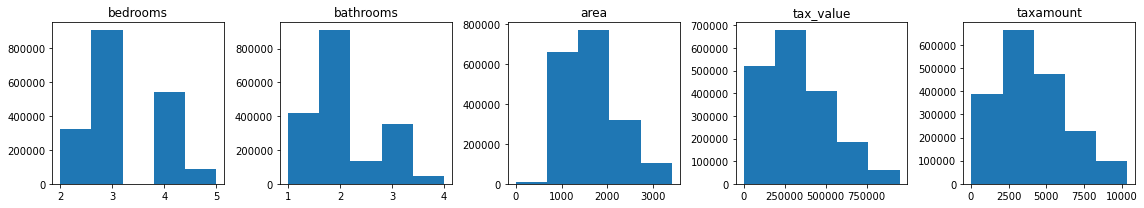

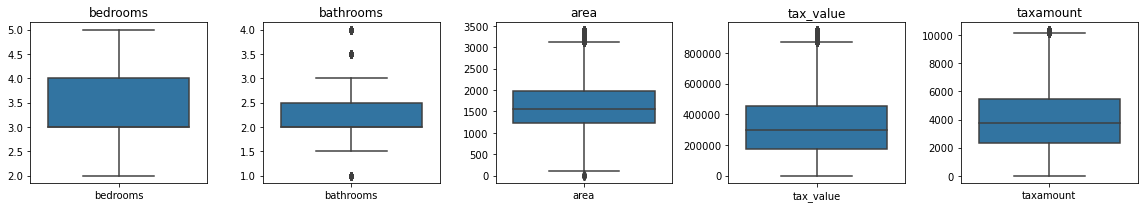

In [33]:
train, validate, test = wrangle_zillow()

In [34]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059.0
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037.0
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037.0
